# Linear Regression Project

## Steps Involve in Machine Learning Projects

- Import Required Libraries
- read dataset
- Eda
 - shape
 - satatistical analysis
 - Mssing values 
 - visualisation ( corrrelation, plots, boxplots etc.)
 - label encoding
- divide dataset in inputs and output
- split dataset into train and test
- prepare model
- train maodel
- test model
- accuracy

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [2]:
data= pd.read_csv('SeoulBikedata.csv')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.shape

(8760, 14)

In [5]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


## EDA

### Statisticall Analysis

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [7]:
miss_val=data.isna().sum()
miss_val

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

# Encoding Data

In [8]:
data.drop(['Date','Functioning Day','Rainfall(mm)', 'Snowfall (cm)'],axis = 1,inplace = True)
data.head(2)


,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday


In [9]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
data["Seasons"] =Le.fit_transform(data["Seasons"])
data["Holiday"] =Le.fit_transform(data["Holiday"])

data.head(3)

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,3,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,3,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,3,1


# Checking Outliers

In [10]:
da_col = data.columns
da_col

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday'],
      dtype='object')

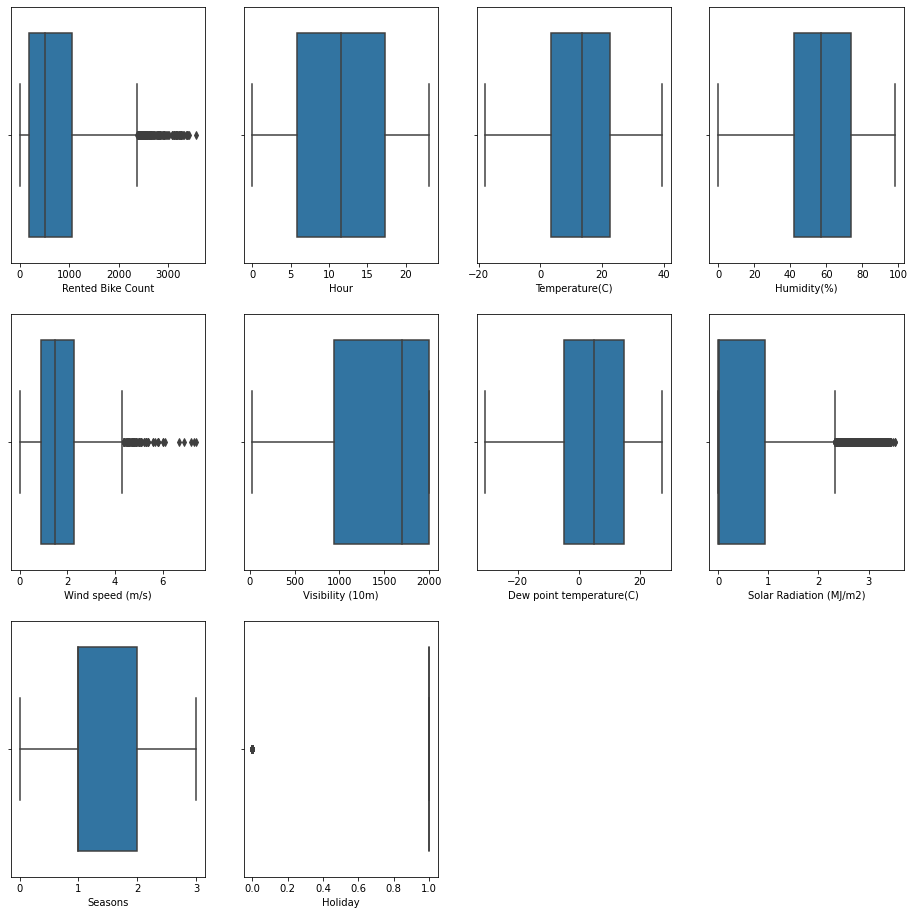

In [11]:
plt.figure(figsize=(16,16))

for i in enumerate(da_col):
    plt.subplot(3,4,i[0]+1)
    sns.boxplot(x = i[1],hue='Rented Bike Count',data = data)

C:\Users\16176\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind speed (m/s)'>

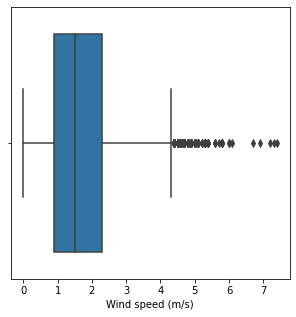

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(data["Wind speed (m/s)"])

In [13]:
Q1 , Q3 = np.percentile(data['Wind speed (m/s)'],[25,75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR) 
up_lim = Q3+ (1.5*IQR)

print(Q1, Q3, IQR, low_lim, up_lim)

0.9 2.3 1.4 -1.1999999999999997 4.3999999999999995


In [14]:
data = data[data["Wind speed (m/s)"]<up_lim]
data = data[data["Wind speed (m/s)"]>low_lim]

C:\Users\16176\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind speed (m/s)'>

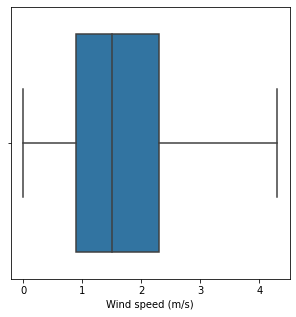

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(data["Wind speed (m/s)"])

In [16]:
Q1 , Q3 = np.percentile(data[ 'Solar Radiation (MJ/m2)'],[25,75])
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR) 
up_lim = Q3+ (1.5*IQR)

print(Q1, Q3, IQR, low_lim, up_lim)

0.0 0.9 0.9 -1.35 2.25


In [17]:
data = data[data['Solar Radiation (MJ/m2)']<up_lim]
data = data[data[ 'Solar Radiation (MJ/m2)']>low_lim]

C:\Users\16176\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

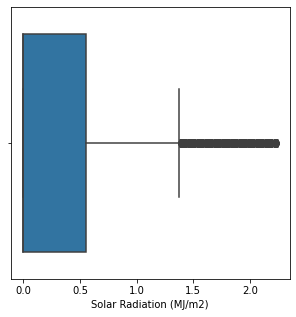

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Solar Radiation (MJ/m2)'])

# Corr

In [19]:
corr_data= data.corr()
corr_data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Holiday
Rented Bike Count,1.000000,0.414797,0.537780,-0.176562,0.135288,0.196567,0.382032,0.246138,-0.243095,0.075650
Hour,0.414797,1.000000,0.116513,-0.233066,0.287022,0.093947,0.001622,0.147530,0.000628,0.000758
Temperature(C),0.537780,0.116513,1.000000,0.243716,-0.065874,0.014340,0.925929,0.251453,-0.351972,0.050671
Humidity(%),-0.176562,-0.233066,0.243716,1.000000,-0.301664,-0.546503,0.581140,-0.389728,-0.143467,0.051126
Wind speed (m/s),0.135288,0.287022,-0.065874,-0.301664,1.000000,0.165041,-0.178699,0.289969,0.122844,-0.014212
Visibility (10m),0.196567,0.093947,0.014340,-0.546503,0.165041,1.000000,-0.185429,0.116002,-0.009530,-0.035920
Dew point temperature(C),0.382032,0.001622,0.925929,0.581140,-0.178699,-0.185429,1.000000,0.045623,-0.343955,0.060285
Solar Radiation (MJ/m2),0.246138,0.147530,0.251453,-0.389728,0.289969,0.116002,0.045623,1.000000,-0.063242,0.011302
Seasons,-0.243095,0.000628,-0.351972,-0.143467,0.122844,-0.009530,-0.343955,-0.063242,1.000000,-0.053116
Holiday,0.075650,0.000758,0.050671,0.051126,-0.014212,-0.035920,0.060285,0.011302,-0.053116,1.000000


<AxesSubplot:>

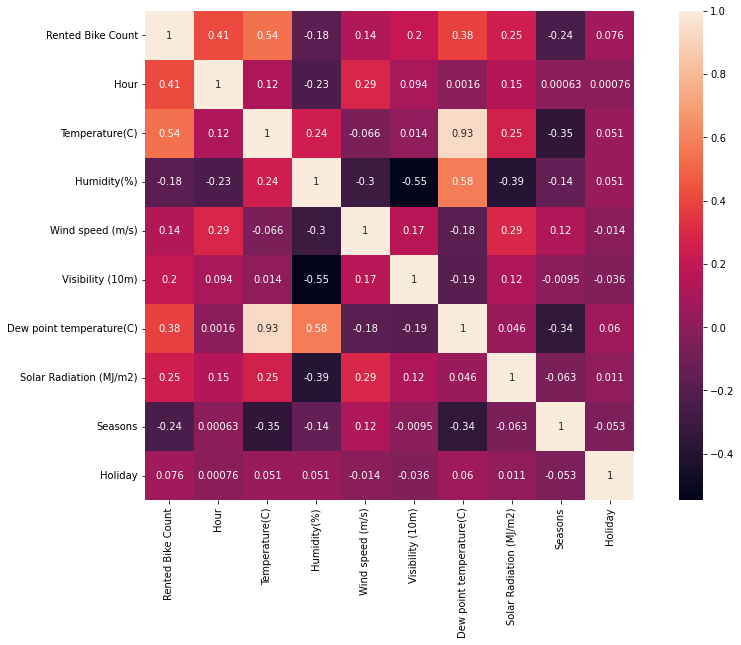

In [20]:
plt.figure(figsize= (16,9))
sns.heatmap(corr_data, annot= True, square=True)

In [21]:
corr_data = corr_data['Rented Bike Count'][:-1]
corr_data[abs(corr_data)>=0.30].sort_values(ascending = True)

Dew point temperature(C)    0.382032
Hour                        0.414797
Temperature(C)              0.537780
Rented Bike Count           1.000000
Name: Rented Bike Count, dtype: float64

# Spliting Dataset

In [22]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Seasons', 'Holiday'],
      dtype='object')

In [23]:
x = data.drop(['Rented Bike Count'],axis = 1)

y = data['Rented Bike Count']

In [24]:
print(x.shape, y.shape)

(7908, 9) (7908,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

# Testing Model

In [27]:
model_pred=model.predict(x_test)

# Checking Accuracy

In [28]:
model_score = model.score(x_test, y_test)
print("Accuracy Score is:",model_score)

Accuracy Score is: 0.5196219072348942


# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(x_train,y_train)
ridge_score = ridge.score(x_test, y_test)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5196354511437161
number of feature used: 9


# Lasso Regression

In [32]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(x_train,y_train)
lasso_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5200222195382457
number of feature used: 9


C:\Users\16176\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365412.58758068085, tolerance: 276708.6393008062
  model = cd_fast.enet_coordinate_descent(
